# Linear 2D classifier

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from sklearn.utils import shuffle

/Users/arnab/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/Users/arnab/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


(1000, 2)
float32
(2000, 1)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


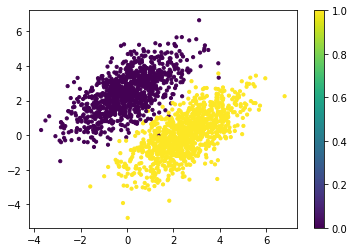

In [2]:
np.random.seed(42)

n_samples_per_class = 1000

neg_samples = np.random.multivariate_normal(mean=[0, 2.5],cov = [[1, 1.5], [1.5, 1]], size=n_samples_per_class).astype(np.float32)
pos_samples = np.random.multivariate_normal(mean=[2.5, 0],cov = [[1, 1.5], [1.5, 1]], size=n_samples_per_class).astype(np.float32)

print(neg_samples.shape)
print(neg_samples.dtype)

# plt.plot(neg_samples[:,0], neg_samples[:,1], '.')
# plt.plot(pos_samples[:,0], pos_samples[:,1], '.')
# plt.show()

input = np.vstack((neg_samples, pos_samples))

# target = np.hstack((np.zeros((n_samples_per_class)), np.ones((n_samples_per_class)))).astype(np.float32)
target = np.vstack((np.zeros((n_samples_per_class,1)), np.ones((n_samples_per_class,1)))).astype(np.float32)
print(target.shape)
print(target)

# target
# np.random.shuffle(input)
# np.random.shuffle(target)

input, target = shuffle(input, target, random_state=42)  # You can set a random seed for reproducibility


# print(target[0:10])


plt.scatter(input[:,0], input[:,1], c=target, cmap='viridis', s=10)
plt.colorbar()
plt.show()

In [3]:
tf.random.set_seed(42)

input_dim =2 
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim), minval=-0.01, maxval=0.01))
display(W)

b = tf.Variable(initial_value=tf.zeros(output_dim))
display(b)


<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.00329124],
       [-0.00117986]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [4]:
def model(inputs):
    return tf.matmul(inputs,W)+b
    # return tf.nn.relu(tf.matmul(inputs,W)+b)
    # return tf.nn.sigmoid(tf.matmul(inputs,W)+b)


In [5]:
# def sq_loss(targets, predictions):
#     per_sample_loss = tf.square(targets-predictions)
#     return tf.reduce_mean(per_sample_loss)

In [6]:
learning_rate = 0.01

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        per_sample_loss = tf.square(targets-predictions)
        loss = tf.reduce_mean(per_sample_loss)
        
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_W*learning_rate)
    b.assign_sub(grad_loss_b*learning_rate)
    return loss


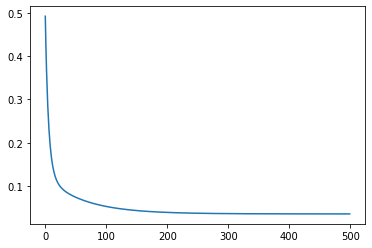

In [7]:
loss_t = []

for step in range(500):
    loss = training_step(input, target)
    loss_t.append(loss)
    # print(f'loss at step {step}: {loss:.4f}')

plt.plot(loss_t)


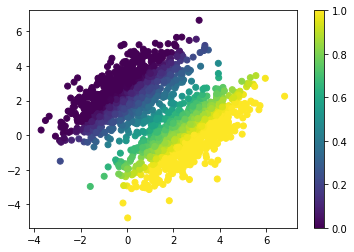

In [8]:
predictions = model(input)
plt.scatter(input[:, 0], input[:, 1], c=predictions[:, 0], vmin=0, vmax=1)
plt.colorbar()
plt.show()

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17774972],
       [-0.16914277]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.48139024], dtype=float32)>


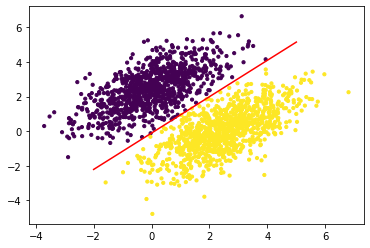

In [9]:
print(W)
print(b)

x = np.linspace(-2,5,100)
# y = np.linspace(-2,5,100)

y = (W[0]*x+b-0.5)/(-W[1])

plt.plot(x,y, color='red')
predictions = model(input)
plt.scatter(input[:, 0], input[:, 1], c=predictions[:, 0] > 0.5, s=10)
plt.show()

In [52]:
# # Import Libraries

# import numpy as np
# import matplotlib.pyplot as plt
# from IPython.display import display, clear_output

# # Create figure and subplot

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1) 

# # Define and update plot

# for i in range(20):
#     x = np.linspace(0, i, 100);
#     y = np.cos(x) 
#     ax.set_xlim(0, i)    
#     ax.cla()
#     ax.plot(x, y)
#     display(fig)    
#     clear_output(wait = True)
#     plt.pause(0.1)